---
<div style="text-align: center;" >
    <h1>
        <b>データサイエンスプログラミング演習</b>
    </h1>
    <h3>
        第7,　8回授業ノート
    </h3>
</div>
<div style="text-align: right">
    <br/>
    立津尚也
</div>

---

## **前回（2019/10/1）の復習**
- ### **Pandas**
>　**Pandas** はPythonで表形式のデータを扱うためのパッケージである。表や時系列データの扱いを得意とし、主にデータの加工・集計に用いる。単純なデータ集計であれば **Pandas** の機能だけで十分完結できるほど、多くの機能を備えている。</br>
　データを取得・収集できたとしても、扱いやすい形式に変換できなければ分析を始めることはできない。具体的には、データの重複や誤記、表記の揺れなどを探し出し、削除や修正、正規化などを行い、データの品質を高める＝ **データクレンジング** を行う必要がある。 **Pandas** を覚え、データを自由自在に加工できるようになると、円滑にデータ分析を行うことができる。

- ### **データ分析プロセスのフレームワーク**
|KDD|CRISP-DM|SEMMA|
|:---:|:---:|:---:|
| |ビジネス課題の理解|
|データ取得|データ取得と理解|データ取得|
|前処理|データ取得と理解|データ理解|
|前処理|データ準備|データ加工|
|データ加工|データ準備|データ加工|
|データマイニング|モデリング|モデリング|
|解釈と評価|評価|評価と施策の実行
| |施策の実行|評価と施策の実行

- KDD:Knowledge Discovery in Database (Fayyad, 1996)
- <b>CRISP-DM:Cross Industry Standard Process for Data Mining (Chapman, p.et al, 2000)</b>
- SEMMA:Sample, Explore, Modify, Model and Assess (SAS Enterprise Minir, 2008)

> **ビジネス理解** 
- 顧客がどのようなビジネスを行っていて、何を求めているのかをヒアリングを通じて把握。
<br> 例：「データから○○が分かる（できる）ようになったら嬉しいですか？」という風に探っていってニーズを探る。

> **データ取得と理解**
- 顧客からデータを受け取り、中身を確認。データの信頼性（欠損値や外れ値がどれくらいあるか）をチェックしたり、集計や可視化を行う。

> **データ準備：**
- 詳細な分析、モデリングを行うための準備。欠損値や外れ値を除去したり、文字列を対応する数値に置き換えたりする。また数値を標準化し、複数のファイルを統合し変数を抽出する作業などを行う。

---
#### **セル操作**
- escボタンを押し、Modeを `Edit` → `Command` にしたら、セルの操作を行うことができる
    - a:現在のセルの上に新たにセルを挿入
    - b:現在のセルの下に新たにセルを挿入
    - dd:現在のセルを削除
    - X:現在のセルをカット
    - c:現在のセルをコピー
    - v:コピーまたはカットしたセルを現在のセルの下に貼り付け
    - z:セル操作を元に戻す = Undo(Redo = shift + z)    

---
### **DataFrameによるデータ操作**

In [1]:
#%pip list

#### **1. CSVファイルの読み込み、先頭部分だけを表示する方法**

In [2]:
import pandas as pd

df = pd.read_csv(
    'data/temp.csv',
    encoding = 'cp932' 
)
df.head()

,date,station,temp
0,2018/9/1,札幌,19.5
1,2018/9/1,青森,21.5
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5


#### **※Windowsで作成したデータの場合、文字コードを　`Shift_JIS` または　`cp932` に設定して読み込む**

#### **2. 指定した行だけを表示する方法**

In [3]:
#すべての行を表示する
pd.set_option('display.max_rows', None)
#df

In [4]:
df.iloc[50:62] #50〜61番目の行を取り出す　0番から始まる点に注意　　iloc ・・・　integer-location 行,列を番号で指定

,date,station,temp
50,2018/9/2,札幌,NaN
51,2018/9/2,青森,21.6
52,2018/9/2,仙台,21.0
53,2018/9/2,東京,22.1
54,2018/9/2,福岡,27.3
55,2018/9/2,鹿児島,NaN
56,2018/9/2,那覇,28.1
57,2018/9/2,波照間,NaN
58,2018/9/2,秋田,23.1
59,2018/9/2,盛岡,21.2


#### **3. 指定した列だけを表示する方法**

In [5]:
df['temp'].head() # twmp列(温度)の先頭5行だけを表示

0    19.5
1    21.5
2    21.5
3    25.9
4    25.5
Name: temp, dtype: float64

In [6]:
df['station'].head() # station

0    札幌
1    青森
2    仙台
3    東京
4    福岡
Name: station, dtype: object

#### **4． 列データの計算**

In [7]:
df_mean = df['temp'].mean() #気温の平均値を算出
df_mean
# diffrence between mean and average ?

23.020840197693573

#### **5．平均値を用いて欠損を補完する**

In [8]:
df_fillna = df['temp'].fillna(df_mean)
df.iloc[50:62]

,date,station,temp
50,2018/9/2,札幌,NaN
51,2018/9/2,青森,21.6
52,2018/9/2,仙台,21.0
53,2018/9/2,東京,22.1
54,2018/9/2,福岡,27.3
55,2018/9/2,鹿児島,NaN
56,2018/9/2,那覇,28.1
57,2018/9/2,波照間,NaN
58,2018/9/2,秋田,23.1
59,2018/9/2,盛岡,21.2


#### **6.欠損を補完した列『temp』を元のDataFrame『df』に反映させる**

In [9]:
# 欠損値(NaN)の箇所を平均値で埋める
df['temp'] = df['temp'].fillna(df_mean)
# 欠損値が保管されているかを確認
df.iloc[50:62]

,date,station,temp
50,2018/9/2,札幌,23.02084
51,2018/9/2,青森,21.60000
52,2018/9/2,仙台,21.00000
53,2018/9/2,東京,22.10000
54,2018/9/2,福岡,27.30000
55,2018/9/2,鹿児島,23.02084
56,2018/9/2,那覇,28.10000
57,2018/9/2,波照間,23.02084
58,2018/9/2,秋田,23.10000
59,2018/9/2,盛岡,21.20000


---

## **今回の演習（2019/10/15）**

#### pandasの構造
- 一次元：リストのような形式・・・ **Series**
- 二次元：表のような形式・・・ **DateFrame**

#### **1.Seriesの操作練習**

|0|a|
|---|---|
|1|b|
|2|c|
|3|d|
|4|e|

In [10]:
import pandas as pd

sample_list = ['a','b','c','d','e']
# sample_list = ['','','','','']
# sample_list = list('abcde') #この記述の仕方でもOK
series = pd.Series(sample_list)
series

0    a
1    b
2    c
3    d
4    e
dtype: object

In [11]:
series_1 = series[0] # 行番号は0から始まる点に注意
series_1

'a'

**行ラベルはデフォルトで、0, 1, 2, 3と0から始まる数字が設定される。**</br>
行ラベルを変更することは可能

In [12]:
series.index = ['i1','i2','i3','i4','i5'] # 行のインデックスをオリジナルに設定
series

i1    a
i2    b
i3    c
i4    d
i5    e
dtype: object

In [13]:
series_i2 = series['i2']
series_i2

'b'

----

#### **2.DataFrameの操作練習**
| |0|1|2|3|
|---|---|---|---|---|
|0|a|b|c|d|
|1|e|f|g|h|

In [14]:
import pandas as pd

"""
df = pd.DataFrame(
    [
        ['a','b','c','d'],
        ['e','f','g','h']
    ]
)
"""

df = pd.DataFrame(
    [
        list('abcd'), #このように簡略化できる
        list('efgh')
    ]
)

df

,0,1,2,3
0,a,b,c,d
1,e,f,g,h


In [15]:
# 列の情報を表示
df_columns = df.columns
df_columns

RangeIndex(start=0, stop=4, step=1)

In [16]:
df.columns = list('ABCD')
df

,A,B,C,D
0,a,b,c,d
1,e,f,g,h


In [17]:
# 行の情報を表示
df_index = df.index
df_index

RangeIndex(start=0, stop=2, step=1)

In [18]:
df.index = list('あい')
df

,A,B,C,D
あ,a,b,c,d
い,e,f,g,h


In [19]:
df.columns = ['Name','Weight','Height','BMI']
df

,Name,Weight,Height,BMI
あ,a,b,c,d
い,e,f,g,h


In [20]:
# 列名、行名を指定してDataFrameを作成することもできる
import pandas as pd

df = pd.DataFrame(
    [
        list('abcd'),
        list('efgh')
    ],
    index = ['A','B'],
    columns = ['i1','i2','i3','i4']
)
df

,i1,i2,i3,i4
A,a,b,c,d
B,e,f,g,h


<div style="padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;">
    <b>練習問題1　授業中に指定したDataFrameを作成しなさい</b>
<div>

In [21]:
#ここに回答を記述
import pandas as pd

df = pd.DataFrame(
    [
        list('abcd'),
        list('efgh'),
        list('ijkl'),
        list('mnop')
    ],
    index = ['A','B','C','D'],
    columns = ('first','second','third','fourth')
)
df

,first,second,third,fourth
A,a,b,c,d
B,e,f,g,h
C,i,j,k,l
D,m,n,o,p


---

#### データセットを具体的にしてDataFrame操作の練習

In [22]:
import pandas as pd
df = pd.DataFrame(
    [
        ['ザイオン',201,129],
        ['バークレー',198,120],
        ['ケンプ',208,104]
    ],
    index = ['first','second','third'],
    columns = ['Name','Height','Weight']
)
df

,Name,Height,Weight
first,ザイオン,201,129
second,バークレー,198,120
third,ケンプ,208,104


In [23]:
heights = df['Height']
heights

first     201
second    198
third     208
Name: Height, dtype: int64

In [24]:
max_heights = heights.max()
max_heights

208

In [25]:
mean_heights = heights.mean() #meanはただの平均で、averageは重みなども含む
mean_heights

202.33333333333334

In [26]:
#身長と体重だけを表示させたい
df_HW = df[['Height','Weight']]
df_HW

,Height,Weight
first,201,129
second,198,120
third,208,104


<div style="padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;">
    <b>練習問題2　名前と体重だけを表示させなさい</b>
<div>

In [27]:
#ここに回答を記述
df_HW = df[['Name','Weight']]
df_HW

,Name,Weight
first,ザイオン,129
second,バークレー,120
third,ケンプ,104


In [28]:
df

,Name,Height,Weight
first,ザイオン,201,129
second,バークレー,198,120
third,ケンプ,208,104


---

行と列のラベルを指定して特定のデータを取得できる。
DataFrame.loc[行ラベル, 列ラベル] と指定

In [29]:
# 1番目の行データを表示　※0番目から始まる点に注意
df_loc = df.loc['first','Height']
df_loc

201

DataFrame.iloc[行番号, 列番号]でも絞り込める

In [30]:
# 1番目の行データの中で、1列目の値を表示　※行も列も、0番目から始まる点に注意
df_loc = df.iloc[0,1]
df_loc

201

In [31]:
# 行列指定
df_loc_rowcol = df.loc[['first','third'],['Name','Weight']]
df_loc_rowcol

,Name,Weight
first,ザイオン,129
third,ケンプ,104


In [32]:
df['Position'] = 'PF'
df

,Name,Height,Weight,Position
first,ザイオン,201,129,PF
second,バークレー,198,120,PF
third,ケンプ,208,104,PF


----

#### **3.時系列データの操作**
1. TSVファイルの読み込み

In [33]:
import pandas as pd

# 売上データのTSVファイルの読み込み
df_tsv = pd.read_table('data/product_log.tsv')
df_tsv
df_tsv.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [34]:
df_tsv.shape[0] #行数を表示する、CSVファイルも同じ

40

In [35]:
df_tsv.shape[1] #列数を表示する、CSVファイルも同じ

3

In [36]:
# 型やメモリの確認
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     40 non-null     object 
 1   Num      36 non-null     float64
 2   Product  40 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [37]:
df_tsv.mean()

Num    3.583333
dtype: float64

In [38]:
df_tsv.count() # countを使うことで欠損値を数えることもできる。　今回はNumが他より4少ないので欠損値が4つある。

Date       40
Num        36
Product    40
dtype: int64

In [39]:
#Num列の中央値を表示
df_tsv.Num.median()

4.0

In [40]:
# サマリ表示　数値データだけを採用
df_tsv.describe()

,Num
count,36.000000
mean,3.583333
std,1.421770
min,1.000000
25%,2.000000
50%,4.000000
75%,4.250000
max,6.000000


In [41]:
# サマリ表示　数値データ以外も含めて表示
df_tsv.describe(include='all') #欠損値も含まれる

,Date,Num,Product
count,40,36.000000,40
unique,40,NaN,2
top,2017-02-01,NaN,A
freq,1,NaN,21
mean,NaN,3.583333,NaN
std,NaN,1.421770,NaN
min,NaN,1.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,4.250000,NaN


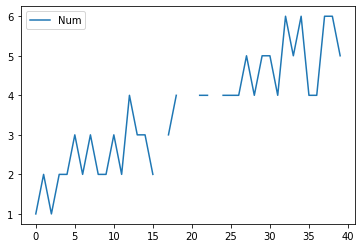

In [42]:
df_tsv.plot(); #セミコロンをつけると文字出力を非表示にできる

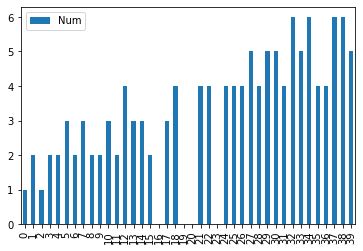

In [43]:
df_tsv.plot.bar(); # barを後ろにつけると棒グラフなる。他にもhistなどがある。

In [44]:
# 欠損値をカウントします
df_tsv.isnull().sum() 

Date       0
Num        4
Product    0
dtype: int64

In [45]:
# 欠損地が含まれる行のみ抽出
df_tsv[df_tsv.isnull().any(1)] #anyはtrue, falseを意味し、1はtrue、　0はfalse

,Date,Num,Product
16,2017-02-08,NaN,A
19,2017-02-16,NaN,A
20,2017-02-18,NaN,A
23,2017-02-24,NaN,A


**時系列データを扱うためには、日付時刻型があった方が都合がいい**

----